<h1>Rain-Induced Fluctuations in Singapore's Tourism Number</h1>

<h2>Table of Content</h2>

1. [Introduction](#Introduction)
2. [Loading Packages and Prepping Data](#Loading-Packages-and-Prepping-Data)
3. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
4. [Data Analysis and Visualization](#Data-Analysis-and-Visualization)
5. [Conclusions and Recommendations](#Conclusions-and-Recommendations)
6. [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## <a id = "Introduction">Introduction</a>

Many studies had been performed over the past decades to elucidate the relationships between weather and tourism. It had been shown that timing of travel and destination choice made by tourists are highly influenced by weather and climate (Gössling et al., 2016). Weather also has a huge influence on activities, experiences and satisfaction (Steiger et al., 2016). <br>
A study done between 2013 and 2014 revealed that their discussion with 22 respondents predominantly revolved around rain, when prompted about weather in their past travels. Every respondent had pointed out that rain led to a negative holiday experience. Among all the negative weather experiences mentioned by the respondents, rain stood out as the most frequently cited memory. Reasons given includes ‘last-minute change of plans’ and ‘lack of indoor activities’ (Gössling et al., 2016).  
A separate study showed that summer tourists on average, can accept up to 2.1 days of continuous rain for a 1-week holiday (Steiger et al., 2016). Singapore is country with high number of rainy days and two monsoon seasons. Therefore, this analysis will look at whether rainy seasons will affect our tourism rate.<br>
Due to COVID-19 situation, we will ignore the tourist statistics from 2020 to present. To simplify the analysis, multiple countries had been grouped into regions to look at their tourism trend in Singapore. The regions we are analysing are Southeast Asia, Greater China, North Asia, West Asia, Americas, Europe, Oceania and Africa. The list of countries in each region are listed in the README file.<br>


References:<br>
<small>Gössling, S., Abegg, B., & Steiger, R. (2016). “It Was Raining All the Time!”: Ex Post Tourist Weather Perceptions. Atmosphere, 7(1), Article 1. https://doi.org/10.3390/atmos7010010 <br>
Steiger, R., Abegg, B., & Jänicke, L. (2016). Rain, Rain, Go Away, Come Again Another Day. Weather Preferences of Summer Tourists in Mountain Environments. Atmosphere, 7(5), Article 5. https://doi.org/10.3390/atmos7050063</small>




## <a id = "Loading-Packages-and-Prepping-Data">Loading Packages and Prepping Data</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-pastel')

In [2]:
#Datasets:
highest_daily_rainfall = pd.read_csv('data/rainfall-monthly-highest-daily-total.csv')
no_of_rain_monthly = pd.read_csv('data/rainfall-monthly-number-of-rain-days.csv')
total_monthly_rainfall = pd.read_csv('data/rainfall-monthly-total.csv')
mean_relative_humidity = pd.read_csv('data/relative-humidity-monthly-mean.csv')
sunshine_duration = pd.read_csv('data/sunshine-duration-monthly-mean-daily-duration.csv')
profile = pd.read_excel('data/tourism-industry-profile-monthly.xlsx', sheet_name = 'T1')
length_of_stay = pd.read_excel('data/tourism-industry-profile-monthly.xlsx', sheet_name = 'T2')
revenue = pd.read_excel('data/singapore-tourism-revenue.xlsx', sheet_name='2019 TR')

In [3]:
#To look at general trends by regions (a group of countries)
profile_by_region = profile.iloc[[1, 10, 15, 25, 32, 36, 52, 56], :] #only selecting rows of interest
profile_by_region = profile_by_region.rename({'Data Series':'Index'}, axis = 1)
profile_by_region = profile_by_region.T 
profile_by_region.columns = profile_by_region.iloc[0]
profile_by_region = profile_by_region[1:]
profile_by_region = profile_by_region[::-1] #reversing the date row order so that it will go from oldest to latest
profile_by_region = profile_by_region.reset_index()
profile_by_region = profile_by_region.rename({'index':'month'}, axis = 1)
profile_by_region.columns = profile_by_region.columns.str.strip() #removing white space in column title from the csv

In [4]:
profile_by_region.head()

Index,month,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa
0,1978 Jan,64500,na,na,1420,10105,25643,32710,587
1,1978 Feb,57650,na,na,1455,9996,26929,17189,354
2,1978 Mar,63299,na,na,3740,11982,29549,19637,405
3,1978 Apr,73782,na,na,2007,13951,25613,20123,736
4,1978 May,68036,na,na,2039,17022,20421,26288,514


In [5]:
#converting the 'na' string to NaN so that I can change the columns to numeric later
profile_by_region = profile_by_region.replace('na', np.nan) 

In [6]:
#to standardize the {year-month} format between different datasets for easier merging and analysis
def convert_date(the_df, month_col):
    monthdict = {'-01':' Jan', '-02':' Feb', '-03':' Mar', '-04':' Apr', '-05':' May', '-06':' Jun', '-07':' Jul','-08':' Aug', '-09':' Sep', '-10':' Oct', '-11':' Nov', '-12':' Dec'}
    the_df[month_col] = the_df.replace({month_col:monthdict}, regex=True)[month_col]
    return the_df

In [7]:
#merging different datasets into one dataframe
datasets = [highest_daily_rainfall, no_of_rain_monthly, total_monthly_rainfall, mean_relative_humidity, sunshine_duration]
for dataset in datasets:
    dataset = convert_date(dataset, 'month')
    profile_by_region = profile_by_region.merge(dataset, on = 'month')

In [8]:
profile_by_region.head()

,month,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs
0,1982 Jan,86569,NaN,NaN,3687,12654,37600,32964,1570,36.5,10,107.1,81.2,5.6
1,1982 Feb,80910,NaN,NaN,3366,15162,37046,21465,1112,9.4,5,27.8,79.5,7.6
2,1982 Mar,82332,NaN,NaN,3924,15901,39669,25585,922,61.7,11,160.8,82.3,5.1
3,1982 Apr,90806,NaN,NaN,3690,16164,35613,24377,955,45.1,14,157.0,85.9,4.7
4,1982 May,95876,NaN,NaN,3222,17131,30016,27511,868,33.0,10,102.2,83.2,5.8


In [9]:
#creating new column for the year and month
profile_by_region = profile_by_region.rename({'month':'Time Period'}, axis = 1)
profile_by_region['year'] = profile_by_region['Time Period'].str[:5].astype('int64')
profile_by_region['month'] = profile_by_region['Time Period'].str[5:]
profile_by_region.iloc[:,1:9] = profile_by_region.iloc[:,1:9].astype('float64')

In [10]:
profile_by_region.head()

,Time Period,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year,month
0,1982 Jan,86569.0,NaN,NaN,3687.0,12654.0,37600.0,32964.0,1570.0,36.5,10,107.1,81.2,5.6,1982,Jan
1,1982 Feb,80910.0,NaN,NaN,3366.0,15162.0,37046.0,21465.0,1112.0,9.4,5,27.8,79.5,7.6,1982,Feb
2,1982 Mar,82332.0,NaN,NaN,3924.0,15901.0,39669.0,25585.0,922.0,61.7,11,160.8,82.3,5.1,1982,Mar
3,1982 Apr,90806.0,NaN,NaN,3690.0,16164.0,35613.0,24377.0,955.0,45.1,14,157.0,85.9,4.7,1982,Apr
4,1982 May,95876.0,NaN,NaN,3222.0,17131.0,30016.0,27511.0,868.0,33.0,10,102.2,83.2,5.8,1982,May


In [11]:
profile_by_region.info() #missing the first 288 visitors stats for Greater China and North Asia (I am not using those data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 0 to 487
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time Period                488 non-null    object 
 1   Southeast Asia             488 non-null    float64
 2   Greater China              200 non-null    float64
 3   North Asia                 200 non-null    float64
 4   West Asia                  488 non-null    float64
 5   Americas                   488 non-null    float64
 6   Europe                     488 non-null    float64
 7   Oceania                    488 non-null    float64
 8   Africa                     488 non-null    float64
 9   maximum_rainfall_in_a_day  488 non-null    float64
 10  no_of_rainy_days           488 non-null    int64  
 11  total_rainfall             488 non-null    float64
 12  mean_rh                    488 non-null    float64
 13  mean_sunshine_hrs          488 non-null    float64

In [12]:
#preparing and cleaning length of stay data
length_of_stay = length_of_stay.iloc[1:-1,:4]
length_of_stay.drop(11, inplace=True)
length_of_stay.rename({'Data Series':'Length of Stay'}, axis = 1, inplace=True)
length_of_stay['Length of Stay'] = length_of_stay['Length of Stay'].str[:-9].str.strip()
length_of_stay = length_of_stay.T
length_of_stay.columns = length_of_stay.iloc[0]
length_of_stay.drop('Length of Stay', axis=0, inplace=True)
length_of_stay = length_of_stay[::-1]
length_of_stay.iloc[:,1:] = length_of_stay.iloc[:,1:].astype('Int64')
length_of_stay.columns = length_of_stay.columns.str.replace(' Days', '').str.replace(' Day', '')

In [13]:
length_of_stay

Length of Stay,Under 1,1,2,3,4,5,6,7,8-10,11-14,15-29,30-59,60 & Over
2023 Jan,211951.0,138280,132785,147876,98657,55345,33966,25254,38619,25198,36880,9911,3679
2023 Feb,206448.0,139108,147983,151180,91488,47411,29345,19736,23769,15402,24155,8663,3462
2023 Mar,213286.0,149807,156186,157625,99790,52587,31245,22532,27885,17442,24660,8579,3769


In [14]:
#preparing and cleaning 2019 TR revenue data
revenue = revenue.T
revenue.columns = revenue.iloc[0] 
revenue.drop('Market', axis=0, inplace=True)
revenue = revenue.astype('Int64')

In [15]:
revenue

Market,Mainland China,Indonesia,India,Australia,Japan,US,Malaysia,Philippines,South Korea,Vietnam,Others
2019 Tourism Receipt (in S$ millions),4124,3704,1624,1343,1162,885,733,721,675,668,12061


-----------------

## <a id='3'>Exploratory Data Analysis</a>

<h3>1. Exploring Singapore weather trend over 10 years

In [16]:
#filtering to look at the weather trend from Jan 2012 to Dec 2021
ten_years_weather = profile_by_region[(profile_by_region['year'] < 2022) & (profile_by_region['year'] > 2011)].iloc[:,9:]

In [17]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
#general overview of the monthly trends with outliers
ten_years_weather.groupby('month').mean().reindex(months)

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
month,,,,,,
Jan,59.68,13.5,197.91,81.26,5.92,2016.5
Feb,29.82,8.5,95.46,78.55,7.44,2016.5
Mar,38.27,9.7,110.00,77.92,7.07,2016.5
Apr,40.06,15.3,161.60,79.39,6.28,2016.5
May,43.76,15.4,180.46,80.21,5.92,2016.5
Jun,35.44,13.8,128.40,78.16,5.70,2016.5
Jul,38.16,14.1,131.10,77.87,6.39,2016.5
Aug,38.60,14.4,146.52,77.54,6.11,2016.5
Sep,35.32,12.9,127.59,77.29,5.66,2016.5


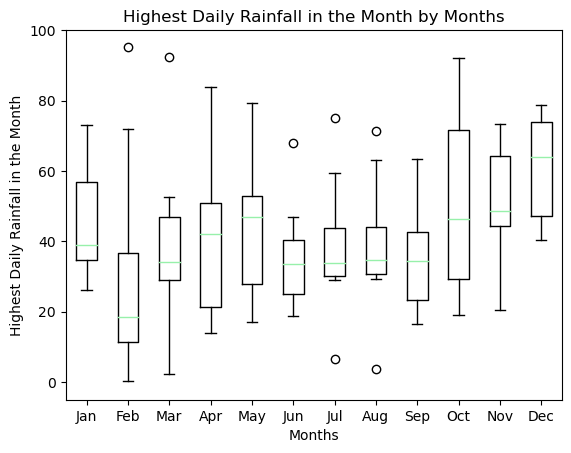

In [18]:
max_rainfall_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['maximum_rainfall_in_a_day'].to_list()
    max_rainfall_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(max_rainfall_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.ylim((-5, 100))
plt.title('Highest Daily Rainfall in the Month by Months')
plt.xlabel('Months')
plt.ylabel('Highest Daily Rainfall in the Month')
plt.show()

Rains in February tends to be smaller than the rain in other months. Heavier rains can be expected between April and May, and between October and January.

<Figure size 640x480 with 0 Axes>

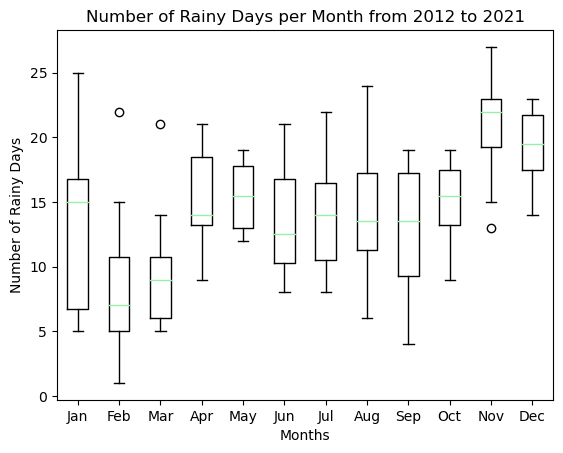

In [19]:
rainy_day_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['no_of_rainy_days'].to_list()
    rainy_day_list.append(data)
plt.figure(figsize = (6.4, 4.8))
fig, ax = plt.subplots()
ax.boxplot(rainy_day_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Number of Rainy Days per Month from 2012 to 2021')
plt.xlabel('Months')
plt.ylabel('Number of Rainy Days')
plt.show()

The general trend for number of rainy days per month was that February is a dry month with little rain. Number of rainy days increases during March to April, and stays relatively consistent from May to September. October saw more rainy days than the previous months, which continues to increase in number of wet days in November and December before decreasing in January.

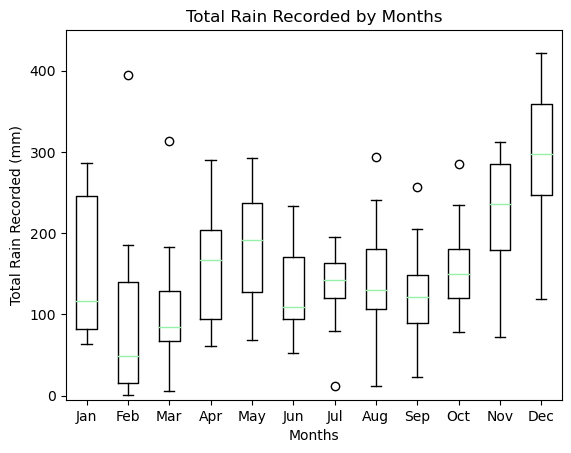

In [20]:
total_rainfall_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['total_rainfall'].to_list()
    total_rainfall_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(total_rainfall_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Total Rain Recorded by Months')
plt.xlabel('Months')
plt.ylabel('Total Rain Recorded (mm)')
plt.ylim((-5,450))
plt.show()

Similar to the trend for maximum daily rain and number of rainy days, we can see a consistent trend that April to May and October to January tend to be wetter months compared to the other months. February is the dryest month.<br>
<small>*The outlier from Jan 2019 heavy rain was excluded from this graph

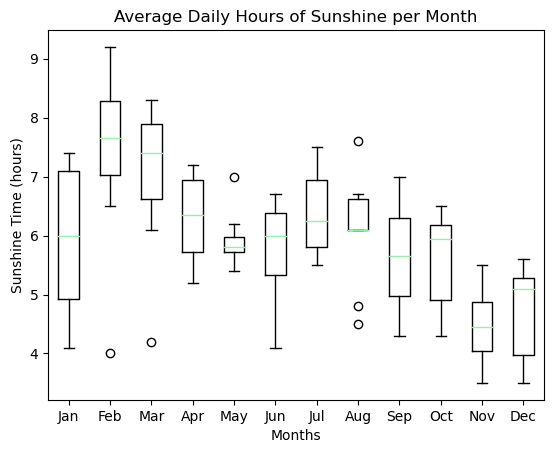

In [21]:
sunshine_list = []
for x in ten_years_weather['month'].unique():
    data = ten_years_weather[ten_years_weather['month'] == x]['mean_sunshine_hrs'].to_list()
    sunshine_list.append(data)
fig, ax = plt.subplots()
ax.boxplot(sunshine_list)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], months)
plt.title('Average Daily Hours of Sunshine per Month')
plt.xlabel('Months')
plt.ylabel('Sunshine Time (hours)')
plt.show()

The dryer months with lesser rainy days on average have longer average daily sunshine time. 

In [22]:
ten_years_weather.corr()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
maximum_rainfall_in_a_day,1.000000,0.421532,0.833611,0.359236,-0.425542,0.011896
no_of_rainy_days,0.421532,1.000000,0.673883,0.646882,-0.733604,-0.058511
total_rainfall,0.833611,0.673883,1.000000,0.576942,-0.632134,0.005237
mean_rh,0.359236,0.646882,0.576942,1.000000,-0.568989,-0.315776
mean_sunshine_hrs,-0.425542,-0.733604,-0.632134,-0.568989,1.000000,0.159629
year,0.011896,-0.058511,0.005237,-0.315776,0.159629,1.000000


In [23]:
#to find the year and month of the highest and lowest total rain volume in a day in the last 10 years
print('Month with highest recorded total rain volume in a day (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['maximum_rainfall_in_a_day'].idxmax()])
print('')
print('Month with lowest recorded total rain volume in a day (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['maximum_rainfall_in_a_day'].idxmin()])

Month with highest recorded total rain volume in a day (2012-2021)
maximum_rainfall_in_a_day    210.6
no_of_rainy_days                17
total_rainfall               692.8
mean_rh                       82.6
mean_sunshine_hrs              4.2
year                          2021
month                          Jan
Name: 468, dtype: object

Month with lowest recorded total rain volume in a day (2012-2021)
maximum_rainfall_in_a_day     0.2
no_of_rainy_days                1
total_rainfall                0.2
mean_rh                      74.5
mean_sunshine_hrs             8.8
year                         2014
month                         Feb
Name: 385, dtype: object


In [24]:
#to find the year and month with the most and least total rain volume in the past 10 years
print('Month with highest recorded total rain volume in a month (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['total_rainfall'].idxmax()])
print('')
print('Month with lowest recorded total rain volume in a month (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['total_rainfall'].idxmin()])

Month with highest recorded total rain volume in a month (2012-2021)
maximum_rainfall_in_a_day    210.6
no_of_rainy_days                17
total_rainfall               692.8
mean_rh                       82.6
mean_sunshine_hrs              4.2
year                          2021
month                          Jan
Name: 468, dtype: object

Month with lowest recorded total rain volume in a month (2012-2021)
maximum_rainfall_in_a_day     0.2
no_of_rainy_days                1
total_rainfall                0.2
mean_rh                      74.5
mean_sunshine_hrs             8.8
year                         2014
month                         Feb
Name: 385, dtype: object


In [25]:
#to find the year and month with the most and least rainy days in the past 10 years
print('Month with most rainy days (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['no_of_rainy_days'].idxmax()])
print('')
print('Month with least rainy days (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['no_of_rainy_days'].idxmin()])

Month with most rainy days (2012-2021)
maximum_rainfall_in_a_day     20.6
no_of_rainy_days                27
total_rainfall               169.6
mean_rh                       83.2
mean_sunshine_hrs              3.8
year                          2018
month                          Nov
Name: 442, dtype: object

Month with least rainy days (2012-2021)
maximum_rainfall_in_a_day     0.2
no_of_rainy_days                1
total_rainfall                0.2
mean_rh                      74.5
mean_sunshine_hrs             8.8
year                         2014
month                         Feb
Name: 385, dtype: object


In [26]:
#to find the year and month with the most and least mean sunshine hours
print('Month with most mean sunshine hours (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['mean_sunshine_hrs'].idxmax()])
print('')
print('Month with least mean sunshine hours (2012-2021)')
print(ten_years_weather.loc[ten_years_weather['mean_sunshine_hrs'].idxmin()])

Month with most mean sunshine hours (2012-2021)
maximum_rainfall_in_a_day    13.4
no_of_rainy_days                5
total_rainfall               31.6
mean_rh                      74.1
mean_sunshine_hrs             9.2
year                         2019
month                         Feb
Name: 445, dtype: object

Month with least mean sunshine hours (2012-2021)
maximum_rainfall_in_a_day    119.8
no_of_rainy_days                21
total_rainfall               348.2
mean_rh                       85.8
mean_sunshine_hrs              3.5
year                          2013
month                          Dec
Name: 383, dtype: object


<h2>2. Exploring Tourists Numbers and Trends by Months</h2>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

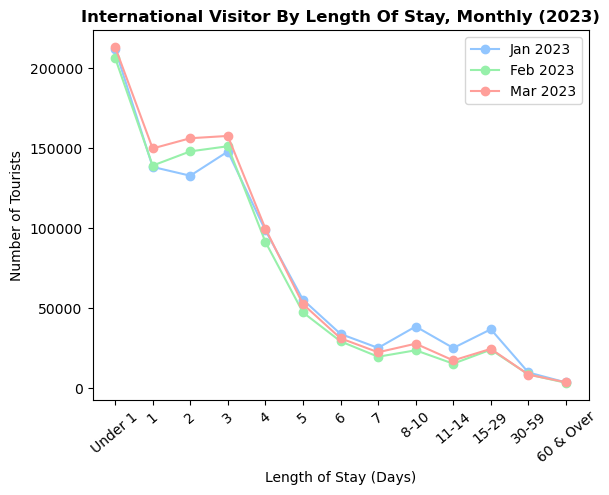

In [27]:
plt.plot(length_of_stay.loc['2023 Jan'], marker = 'o', label = 'Jan 2023')
plt.plot(length_of_stay.loc['2023 Feb'], marker = 'o', label = 'Feb 2023')
plt.plot(length_of_stay.loc['2023 Mar'], marker = 'o', label = 'Mar 2023')
plt.title('International Visitor By Length Of Stay, Monthly (2023)', fontweight='bold')
plt.ylabel('Number of Tourists')
plt.xlabel('Length of Stay (Days)')
plt.legend()
plt.xticks(rotation = 40)

From our latest international tourists data, we can see that most tourists that visits Singapore seldom stay for more than a week. Thus, rainy days are more likely to affect their travel itinerary. 

In [28]:
#I will extract out 5 years worth of data to analyze starting from 2019 to avoid COVID-19 years
five_years_tourists = pd.concat([profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].iloc[:,1:9], 
           profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].iloc[:,-2:]], axis=1)

In [29]:
five_years_tourists.head()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,year,month
396,448133.0,207586.0,130360.0,13037.0,64780.0,158529.0,129274.0,6377.0,2015,Jan
397,380389.0,327971.0,113888.0,9073.0,57924.0,147155.0,72276.0,3562.0,2015,Feb
398,461999.0,198908.0,122861.0,16316.0,64764.0,160349.0,79761.0,5138.0,2015,Mar
399,478213.0,243881.0,88349.0,12262.0,49143.0,128157.0,94029.0,6410.0,2015,Apr
400,512074.0,214376.0,96909.0,10058.0,48014.0,99889.0,85227.0,4663.0,2015,May


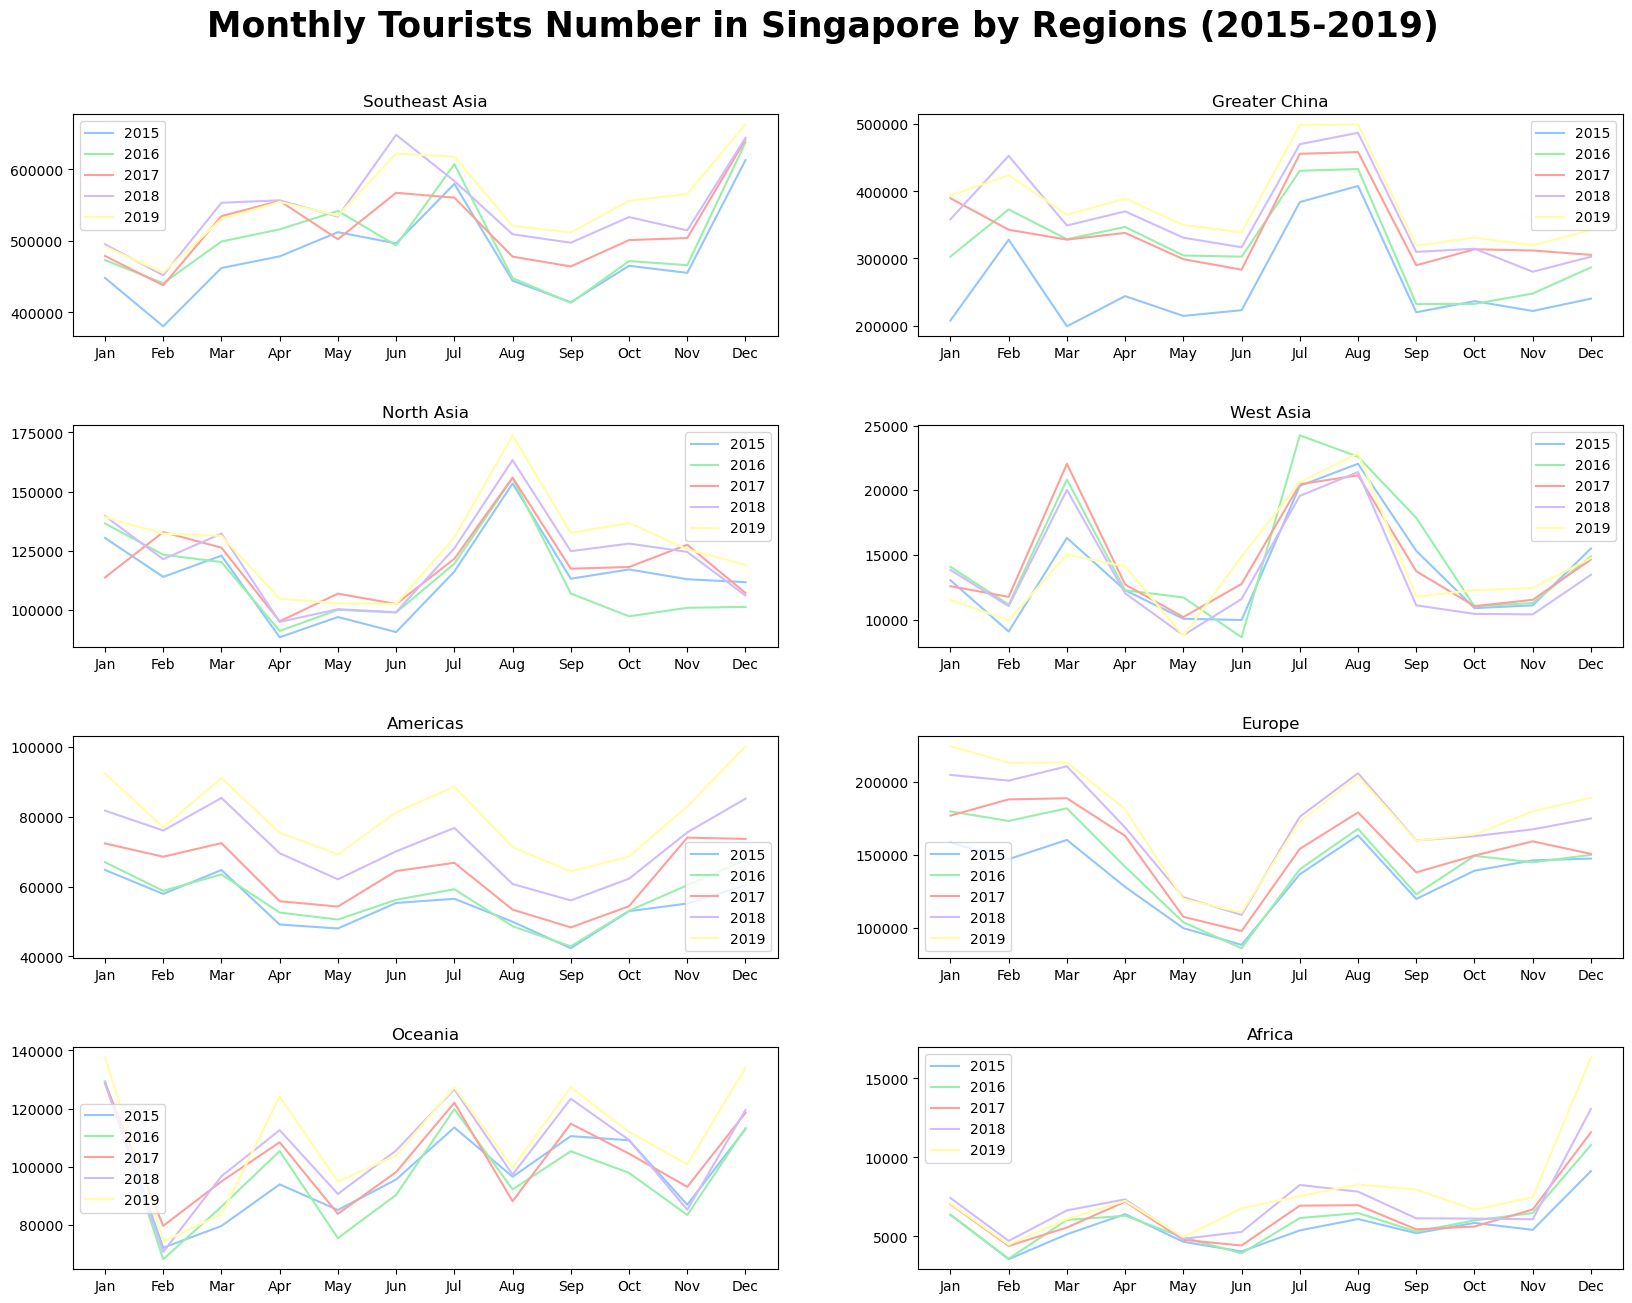

In [30]:
fig, ax = plt.subplots(4,2, figsize = (20,15))
figlist = [ax[0,0], ax[0,1], ax[1,0], ax[1,1], ax[2,0], ax[2,1], ax[3,0], ax[3,1]]
plt.subplots_adjust(hspace = 0.4)
plt.suptitle('Monthly Tourists Number in Singapore by Regions (2015-2019)', fontweight='bold', fontsize = 25, y=0.95)

#SEA
for x in five_years_tourists['year'].unique():
    ax[0,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Southeast Asia'], label = x)

#Greater China
for x in five_years_tourists['year'].unique():
    ax[0,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Greater China'], label = x)

#North Asia
for x in five_years_tourists['year'].unique():
    ax[1,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['North Asia'], label = x)

#West Asia
for x in five_years_tourists['year'].unique():
    ax[1,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['West Asia'], label = x)

#Americas
for x in five_years_tourists['year'].unique():
    ax[2,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Americas'], label = x)

#Europe
for x in five_years_tourists['year'].unique():
    ax[2,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Europe'], label = x)

#Oceania
for x in five_years_tourists['year'].unique():
    ax[3,0].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Oceania'], label = x)

#Africa
for x in five_years_tourists['year'].unique():
    ax[3,1].plot(five_years_tourists['month'].unique(), five_years_tourists[five_years_tourists['year']==x]['Africa'], label = x)

for x,y in zip(figlist, five_years_tourists.columns):
    x.legend()
    x.title.set_text(y)
    x.locator_params(axis='y', tight=None, nbins=4)



Looking at the tourists numbers trend from 2015 to 2019, each region have a travelling pattern that is quite consistent between each year.<br>
For the Southeast Asians, June, July and December are their favourite months for coming to Singapore. February sees the least visits from the Southeast Asians tourists.<br>
Tourists from Greater China tend to visit in February, July and August. The West Asians tourists have a similar pattern, with their preferred months to visit being March, July and August.<br>
North Asians tourists are more likely to visit in August. The European tourists preferred visiting Singapore in the first three months of the year, and in August.<br>
The American tourists have several preferred months to visit Singapore, being January, March, July and December. Oceania tourists saw a similar pattern, preferring to visit in January, April, July, September and December. <br>
The African tourists highly favoured visiting Singapore in December.<br>
<br>
Most regions also showed increase in tourist numbers over the years, with the latest year (2019, in yellow) being higher on the y-axis compared to other years.
<br><br>
From these trends, we can tell that certain regions does not seem to mind Singapore's rainy months, as their peak visiting month coincide with the rainier months (April, May, Nov, Dec). West Asia and Greater China seem to be more likely to have their visiting pattern affected by rainy seasons. We will explore the correlation in the next section.

----------------------

## <a id='4'>Data Analysis and Visualization</a>

In [31]:
#Running correlation test to look at whether rainy seasons and tourists number are correlated
profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2015)].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,0.184884,-0.215372,0.187506,0.507173,-0.047640,0.434241,0.632101,0.271532,0.302196,0.420228,0.228541,-0.174575,0.413959
Greater China,0.184884,1.000000,0.562603,0.517418,0.365996,0.536091,0.109037,0.141355,-0.151997,-0.157585,-0.184602,-0.070758,0.408874,0.526099
North Asia,-0.215372,0.562603,1.000000,0.540427,0.219328,0.676165,0.065049,0.103697,-0.117995,-0.209482,-0.176058,-0.097595,0.294841,0.277592
West Asia,0.187506,0.517418,0.540427,1.000000,0.044985,0.332787,0.201484,0.250984,-0.132421,-0.135414,-0.101138,-0.198959,0.211537,-0.030165
Americas,0.507173,0.365996,0.219328,0.044985,1.000000,0.594237,0.295615,0.506119,0.048708,-0.028009,0.134869,0.221213,0.103341,0.723283
Europe,-0.047640,0.536091,0.676165,0.332787,0.594237,1.000000,0.149656,0.338685,-0.105467,-0.153408,-0.087419,0.003317,0.315187,0.470520
Oceania,0.434241,0.109037,0.065049,0.201484,0.295615,0.149656,1.000000,0.572391,0.168478,0.173761,0.232607,0.138049,-0.184118,0.245073
Africa,0.632101,0.141355,0.103697,0.250984,0.506119,0.338685,0.572391,1.000000,0.270072,0.278628,0.521575,0.219128,-0.239784,0.320369
maximum_rainfall_in_a_day,0.271532,-0.151997,-0.117995,-0.132421,0.048708,-0.105467,0.168478,0.270072,1.000000,0.445683,0.750370,0.229136,-0.445535,-0.016387
no_of_rainy_days,0.302196,-0.157585,-0.209482,-0.135414,-0.028009,-0.153408,0.173761,0.278628,0.445683,1.000000,0.703371,0.624816,-0.693818,-0.002128


From this correlation table, none of the regions have a strong correlation between their visiting frequency and the rainy season. To make sure the correlation is not affected by the 5 years average, we will look at the correlation by year.

In [32]:
#2019
profile_by_region[profile_by_region['year'] == 2019].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,-0.139434,-0.392682,0.367384,0.453332,-0.429814,0.419117,0.661383,0.395436,0.624235,0.689337,0.695354,-0.733150,NaN
Greater China,-0.139434,1.000000,0.540119,0.704669,0.084806,0.399865,-0.044775,-0.113068,-0.624362,-0.511857,-0.479954,-0.497044,0.542941,NaN
North Asia,-0.392682,0.540119,1.000000,0.519148,-0.093999,0.615857,-0.055533,0.028447,-0.254323,-0.497390,-0.416651,-0.626923,0.463743,NaN
West Asia,0.367384,0.704669,0.519148,1.000000,0.190042,0.181519,0.151663,0.289457,-0.289105,-0.206114,-0.109456,-0.280611,0.026844,NaN
Americas,0.453332,0.084806,-0.093999,0.190042,1.000000,0.411691,0.260084,0.519092,0.199931,0.164994,0.452630,0.320681,-0.170852,NaN
Europe,-0.429814,0.399865,0.615857,0.181519,0.411691,1.000000,-0.001332,0.121535,-0.044369,-0.553127,-0.127638,-0.436240,0.470155,NaN
Oceania,0.419117,-0.044775,-0.055533,0.151663,0.260084,-0.001332,1.000000,0.574512,0.263006,0.125876,0.339381,0.309177,-0.549582,NaN
Africa,0.661383,-0.113068,0.028447,0.289457,0.519092,0.121535,0.574512,1.000000,0.388372,0.241659,0.767071,0.539296,-0.604453,NaN
maximum_rainfall_in_a_day,0.395436,-0.624362,-0.254323,-0.289105,0.199931,-0.044369,0.263006,0.388372,1.000000,0.711016,0.752840,0.673158,-0.654701,NaN
no_of_rainy_days,0.624235,-0.511857,-0.497390,-0.206114,0.164994,-0.553127,0.125876,0.241659,0.711016,1.000000,0.646918,0.859319,-0.742535,NaN


<small>2019 data showed that Greater China and North Asia tourist are less likely to visit in months with more rain (r = -0.51, -0.50). Interestingly, data also implied that Southeast Asia tourist are more likely to visit in months with more rain and less sunshine hours.

In [33]:
#2018
profile_by_region[profile_by_region['year'] == 2018].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,-0.292747,-0.505919,0.108240,0.278975,-0.476248,0.386716,0.511721,0.255452,0.143217,0.179072,0.023632,-0.395326,NaN
Greater China,-0.292747,1.000000,0.476615,0.633081,-0.016965,0.498041,-0.118013,-0.010153,-0.349901,-0.685762,-0.403195,-0.458215,0.626420,NaN
North Asia,-0.505919,0.476615,1.000000,0.633174,-0.055977,0.705762,0.003276,0.030739,0.002245,-0.129792,0.145668,0.031807,0.124218,NaN
West Asia,0.108240,0.633081,0.633174,1.000000,0.282417,0.609585,0.198139,0.361949,-0.266121,-0.432870,-0.197659,-0.238268,0.229281,NaN
Americas,0.278975,-0.016965,-0.055977,0.282417,1.000000,0.435127,0.042615,0.449901,-0.400927,0.098894,-0.046240,0.472683,-0.218367,NaN
Europe,-0.476248,0.498041,0.705762,0.609585,0.435127,1.000000,-0.025337,0.284785,-0.469535,-0.299258,-0.221939,0.087776,0.377066,NaN
Oceania,0.386716,-0.118013,0.003276,0.198139,0.042615,-0.025337,1.000000,0.526482,0.476204,0.213589,0.567096,0.259283,-0.319983,NaN
Africa,0.511721,-0.010153,0.030739,0.361949,0.449901,0.284785,0.526482,1.000000,0.102484,0.123850,0.197437,0.228295,-0.144229,NaN
maximum_rainfall_in_a_day,0.255452,-0.349901,0.002245,-0.266121,-0.400927,-0.469535,0.476204,0.102484,1.000000,0.405642,0.786716,0.224249,-0.402310,NaN
no_of_rainy_days,0.143217,-0.685762,-0.129792,-0.432870,0.098894,-0.299258,0.213589,0.123850,0.405642,1.000000,0.756207,0.855635,-0.868456,NaN


<small>2018 data showed that Greater China tourist are less likely to visit in months with more rain (r = -0.69) and preferred visiting in months with more sunshine hours (r = 0.63). Unlike the 2019 data, North Asian tourists does not show any correlation between their visiting pattern and the rainy season. The West Asian tourists showed weak negative correlation (r=-0.43) between their visiting pattern and months with more rains.

In [34]:
#2017
profile_by_region[profile_by_region['year'] == 2017].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,-0.139458,-0.521615,0.185424,0.333543,-0.296866,0.390843,0.654943,0.461739,-0.037736,0.456236,0.086831,-0.017535,NaN
Greater China,-0.139458,1.000000,0.572909,0.635224,0.038701,0.506832,0.182500,0.174871,-0.082687,-0.180431,-0.398939,-0.378247,0.288371,NaN
North Asia,-0.521615,0.572909,1.000000,0.523252,0.003040,0.570125,-0.401347,-0.110697,-0.369722,-0.053273,-0.367709,-0.241880,0.213970,NaN
West Asia,0.185424,0.635224,0.523252,1.000000,0.125701,0.437708,0.092452,0.193015,-0.283707,-0.427885,-0.382165,-0.500353,0.397658,NaN
Americas,0.333543,0.038701,0.003040,0.125701,1.000000,0.349841,0.147895,0.341217,0.522305,0.021350,0.474514,0.532594,-0.115470,NaN
Europe,-0.296866,0.506832,0.570125,0.437708,0.349841,1.000000,0.011256,0.207574,0.050668,0.212457,0.026321,0.246962,-0.010081,NaN
Oceania,0.390843,0.182500,-0.401347,0.092452,0.147895,0.011256,1.000000,0.537717,0.366357,0.197430,0.168609,0.063246,-0.250105,NaN
Africa,0.654943,0.174871,-0.110697,0.193015,0.341217,0.207574,0.537717,1.000000,0.725525,0.544241,0.694513,0.400748,-0.306273,NaN
maximum_rainfall_in_a_day,0.461739,-0.082687,-0.369722,-0.283707,0.522305,0.050668,0.366357,0.725525,1.000000,0.581580,0.855982,0.747153,-0.499953,NaN
no_of_rainy_days,-0.037736,-0.180431,-0.053273,-0.427885,0.021350,0.212457,0.197430,0.544241,0.581580,1.000000,0.703511,0.733018,-0.791077,NaN


<small>Every region except for West Asia (r = -0.42) does not try avoid the rainy season in 2017. The Southeast Asian and American tourists came to Singapore in the months with heavier rains. 

In [35]:
#2016
profile_by_region[profile_by_region['year'] == 2016].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,0.223011,-0.272477,0.180456,0.480611,-0.150769,0.358850,0.610143,0.223473,0.476739,0.320180,-0.097705,0.004627,NaN
Greater China,0.223011,1.000000,0.614597,0.572571,0.045728,0.281429,0.008725,-0.100034,-0.233044,-0.130442,-0.257241,0.247397,0.587382,NaN
North Asia,-0.272477,0.614597,1.000000,0.604175,0.082905,0.607585,0.113040,-0.042874,-0.300404,-0.170711,-0.277976,0.169963,0.498132,NaN
West Asia,0.180456,0.572571,0.604175,1.000000,-0.049140,0.384995,0.343715,0.255533,-0.488056,0.057635,-0.377213,-0.251305,0.437955,NaN
Americas,0.480611,0.045728,0.082905,-0.049140,1.000000,0.453441,0.271175,0.442285,0.164732,0.175167,0.208144,0.296224,0.097196,NaN
Europe,-0.150769,0.281429,0.607585,0.384995,0.453441,1.000000,0.144310,0.274748,-0.327878,-0.138788,-0.245641,-0.049382,0.418209,NaN
Oceania,0.358850,0.008725,0.113040,0.343715,0.271175,0.144310,1.000000,0.522471,-0.120652,0.528343,-0.073001,-0.102915,0.114432,NaN
Africa,0.610143,-0.100034,-0.042874,0.255533,0.442285,0.274748,0.522471,1.000000,0.023993,0.661181,0.366935,-0.506126,-0.169060,NaN
maximum_rainfall_in_a_day,0.223473,-0.233044,-0.300404,-0.488056,0.164732,-0.327878,-0.120652,0.023993,1.000000,0.520556,0.837571,0.106714,-0.721450,NaN
no_of_rainy_days,0.476739,-0.130442,-0.170711,0.057635,0.175167,-0.138788,0.528343,0.661181,0.520556,1.000000,0.746416,-0.197412,-0.642009,NaN


<small>In 2016, no regions showed active avoidance in visiting Singapore during the rainy season. West Asian tourists are less likely to visit in months with heavier rain (r=-0.49). Southeast Asian tourists did not mind the rainier seasons (r=0.48). Tourists from Greater China, North Asia, West Asia and Europe are more likely to visit in the months with more sunshine hours (r > 0.4).

In [36]:
#2015
profile_by_region[profile_by_region['year'] == 2015].corr()

,Southeast Asia,Greater China,North Asia,West Asia,Americas,Europe,Oceania,Africa,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_rh,mean_sunshine_hrs,year
Southeast Asia,1.000000,0.045012,-0.240142,0.288074,0.189772,-0.165579,0.365168,0.580094,0.371534,0.778840,0.718941,0.468240,-0.022352,NaN
Greater China,0.045012,1.000000,0.491335,0.612667,-0.117644,0.309416,-0.035771,-0.063168,0.468750,0.138366,0.195324,-0.300290,0.229495,NaN
North Asia,-0.240142,0.491335,1.000000,0.655634,0.231893,0.783948,0.220095,0.192386,0.694703,-0.260204,0.245620,-0.103380,-0.011263,NaN
West Asia,0.288074,0.612667,0.655634,1.000000,0.003163,0.470883,0.323668,0.368780,0.843770,0.175996,0.497703,-0.132294,0.066235,NaN
Americas,0.189772,-0.117644,0.231893,0.003163,1.000000,0.512101,0.076563,0.181485,0.291994,-0.183889,0.156018,0.167584,0.541448,NaN
Europe,-0.165579,0.309416,0.783948,0.470883,0.512101,1.000000,0.102964,0.394173,0.490192,-0.155427,0.213392,0.080685,0.159668,NaN
Oceania,0.365168,-0.035771,0.220095,0.323668,0.076563,0.102964,1.000000,0.568153,0.254456,0.191553,0.359793,0.068173,-0.167081,NaN
Africa,0.580094,-0.063168,0.192386,0.368780,0.181485,0.394173,0.568153,1.000000,0.392239,0.641399,0.812987,0.636920,-0.234403,NaN
maximum_rainfall_in_a_day,0.371534,0.468750,0.694703,0.843770,0.291994,0.490192,0.254456,0.392239,1.000000,0.171104,0.615201,0.056913,0.128874,NaN
no_of_rainy_days,0.778840,0.138366,-0.260204,0.175996,-0.183889,-0.155427,0.191553,0.641399,0.171104,1.000000,0.727723,0.669866,-0.331823,NaN


<small>In 2015, tourists from most regions still visits despite the heavier rain. No regions showed active avoidance in visiting in months with more rainy days. The Southeast Asian tourists did not mind the rainier seasons, which is consistent with previous year findings.

The above 5 years correlation trend showed that:<br>
1. Greater China tourists are less likely to visit in rainy seasons in recent years (2018, 2019)
2. Southeast Asian tourists generally do not mind rainy seasons as their peak visit months coincide with our rainy seasons

![China outbound travels in 2017 and 2018](china_outbound_travels_1718.jpg)<br>
<small>Source: China Tourism Academy

The above graph is extracted from the China Tourism Academy. The y-axis showed the number of citizens (in 10,000) that went on outbound trip and the x-axis are the months.<br>
The data from China Tourism Academy showed little fluctuation in their outbound travels between months in 2017 and 2018. Hence, their timing of visit to Singapore is unlikely to be due to their travelling peak seasons.

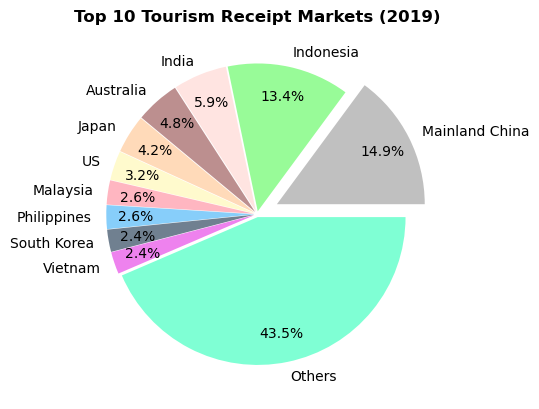

In [37]:
colors = ['silver', 'palegreen', 'mistyrose', 'rosybrown', 'peachpuff', 'lemonchiffon', 'lightpink', 'lightskyblue', 'slategrey', 'violet', 'aquamarine']
revenue.loc['2019 Tourism Receipt (in S$ millions)'].plot(kind='pie', label = '', colors=colors, autopct='%1.1f%%', pctdistance=0.8, explode=[0.15, 0.02, 0.02, 0.02,0.02, 0.02, 0.02, 0.02,0.02, 0.02, 0.02])
plt.title('Top 10 Tourism Receipt Markets (2019)', fontweight='bold')
plt.show()

Text(44.38500694444444, 0.5, 'Number of Tourists')

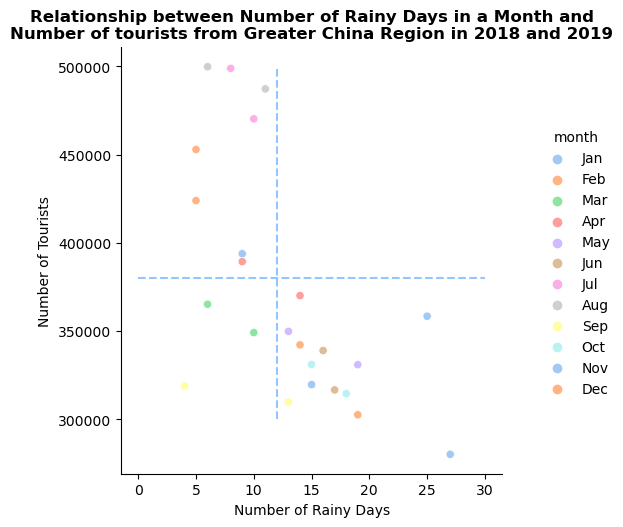

In [39]:
sns.relplot(data = profile_by_region[(profile_by_region['year'] <= 2019) & (profile_by_region['year'] >= 2018)].loc[:,('Time Period', 'month', 'Greater China', 'no_of_rainy_days')], x= 'no_of_rainy_days', y= 'Greater China', hue = 'month', palette = 'pastel')
plt.hlines(380000, 0, 30, linestyles = 'dashed')
plt.vlines(12, 300000, 500000, linestyles= 'dashed')
plt.title('Relationship between Number of Rainy Days in a Month and\nNumber of tourists from Greater China Region in 2018 and 2019', fontweight = 'bold')
plt.xlabel('Number of Rainy Days')
plt.ylabel('Number of Tourists')

In [40]:
#The difference in Greater China region tourist number in the peak month and off-peak month
five_years_tourists[five_years_tourists['year']==2019]['Greater China'].max() - five_years_tourists[five_years_tourists['year']==2019]['Greater China'].min()

180921.0

China being our biggest tourism revenue market in 2019 shows the potential of significantly increasing revenue by increasing the number of visitors during months with lesser visits. The month with the most tourists from Greater China region has an almost 200 thousands difference in monthly tourists from the region compared to the month with the least tourists from Greater China region in the year of 2019. <br>
From the relational plot above, months in the lower right quadrants are months that have high number of rainy days and lower incoming tourists from the Greater China regions. By coming up with more wet weather activities, events and attractions during those months, we can drive the number of incoming visitors up.

--------------

## <a id='5'>Conclusions</a>

There is a possibility that tourists from the Greater China regions are starting to avoid visiting Singapore during the rainy seasons. For the past decades, our raining seasons had been quite consistent, with dry period in February and wetter period at the end of the year. Singapore has been increasing in popularity in terms of tourism destination in the past few years. It is expected that with more international visits, tourists will start to form their opinions on the optimal time to visit the country. <br>
On the other hand, Southeast Asian tourists seem not not mind our rainy seasons. This may be due to the similarity in climate between their country and our country. <br>

The findings showed that there is a correlation between rainy seasons and number of visitors from the Greater China region in recent years. However, as correlation does not imply causation, we need to run further analysis to determine if their timing of visit is indeed influenced by our weather pattern. I recommend doing a survey on Greater China tourists that are planning to visit Singapore in the near future and finding out if the have preference to visit at certain timing of the year and if so, the reason why.<br>

From the data above, we saw that most tourists stayed for less than a week in Singapore when they visit. We can do a survey on Greater China tourists that had visited Singapore in the past 5 years to find out how they decided their timing of visit and investigate if they had encountered rain during their visit and whether it had affected their itinerary and experiences. 

If the tourists from Greater China are more hesistant to visit during rainy season, it would be beneficial to us to target this group of tourists by offering more indoor attractions and events during the rainy seasons. Afterall, Greater China is our top Tourism Receipt market. In 2019, international visitors brought in a total of SGD$27.7 billion, of which SGD$4.124 billion from Mainland China alone. [1] In order to keep our tourism revenue on an upward trend, it is important to identify periods of time that interational visitors are more hesistant to visit, and to come up with more attractions and events that would not be dampened by the rainy seasons. At peak visiting months, Greater China region brings in almost 500 thousands visitors monthly, while low peak months brings in low 300 thousands monthly visitors. By putting focus on our largest market for tourism receipt, we can potentially increase overall tourism revenue by attracting them to visit in the months with lower visit numbers. 
<br><br>
References:<br>
<small>[1] Singapore Tourism Board Annual Report 2019-2020

-------------

## <a id='6'>Coding Challenges</a>

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [41]:
# Code:
alist = [1,2,3,4,5,6]
def cal_mean(alist):
    alistmean = sum(alist)/len(alist)
    return alistmean

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [42]:
# Code:
def cal_std(alist):
    alistmean = sum(alist)/len(alist)
    counter = 0
    for x in alist:
        counter += ((x - alistmean) ** 2)/len(alist)
    return counter ** 0.5